In [1]:
import logging
import gensim
from gensim.models import word2vec, KeyedVectors
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pkuseg
import numpy as np
from nltk.tokenize import MWETokenizer
import itertools
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.manifold import TSNE

In [2]:
model = KeyedVectors.load_word2vec_format('清洗后文本.txt')

[[ 1.3803874   0.2852572 ]
 [ 1.4401556   2.3309312 ]
 [ 2.1266725  -1.2732004 ]
 [ 1.6004866  -0.95752066]
 [-1.4773184   0.12905161]
 [-1.3561082  -0.13599795]
 [-1.2483084   0.12430943]
 [-1.168733   -0.01073013]
 [-1.2972337  -0.49210027]]
[0.4492921 0.1904047]
[2.4615417 1.0431724]


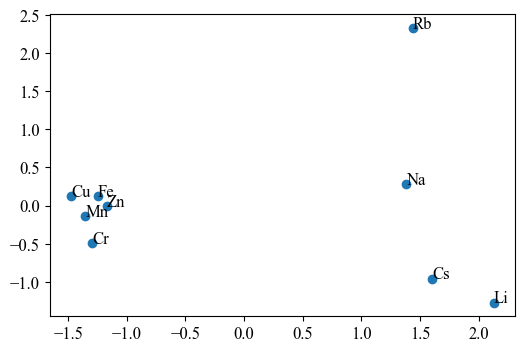

In [32]:
X = np.array(model['Na','Li','Rb','Cs','Cu','Mn','Fe','Zn','Cr'])
pca = PCA(n_components=2) #选择需要降成的维度

Y = pca.fit_transform(X) #将100维词向量降维成2维

print(Y)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

txt = ['Na','Rb','Li','Cs','Cu','Mn','Fe','Zn','Cr'] #图中每个点的标注

x = Y[:,0] #图中每个点的横坐标

y = Y[:,1] #图中每个点的纵坐标

# plt.scatter(x, y)
# for i in range(len(x)):
#     plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.001, y[i]+0.001)) #使用matplotlib在图中画出每个点

# plt.show()
plt.figure(figsize=(6, 4), dpi=100) # 设置图片大小和分辨率
plt.rcParams['font.size'] = 12 # 增大字体大小
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体为Times New Roman


plt.scatter(x, y)
for i in range(len(x)):
    plt.annotate(txt[i], xy=(x[i], y[i]), xytext=(x[i] + 0.001, y[i] + 0.001))
plt.savefig('PCA_cluster.png', dpi=300)
plt.show()